## F-I Curve for the SNNTorch Leaky (LIF) model

In [101]:
import snntorch as snn
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [102]:
data_range = []
i_range = np.arange(1.2,0,-0.01)

for i in i_range:
    data = torch.zeros((125))
    data[5:] = i
    data_range.append(data)

In [103]:
tao_mem = 0.01
timestep = 1 / 250
beta = np.exp(-timestep / tao_mem)

In [104]:
lif = snn.Leaky(beta=beta)

In [105]:
outputs = []
i = 0
for i_current in data_range:
    mem = lif.init_leaky()
    mem_rec = []
    spk_rec = []
    for t in range(125):
        spk, mem = lif(i_current[t], mem)

        spk_rec.append(spk)
        mem_rec.append(mem)

    # convert lists to tensors
    spk_rec = torch.stack(spk_rec).detach().cpu().numpy()
    mem_rec = torch.stack(mem_rec).detach().cpu().numpy()

    outputs.append((i_range[i], i_current, mem_rec, spk_rec))
    i+=1

In [106]:
outputs

[(1.2,
  tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
          1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000, 1.2000,
         

In [107]:
i_array = [x[0] for x in outputs]
f_array = [np.where(x[-1] == 1)[0].shape[0] for x in outputs]

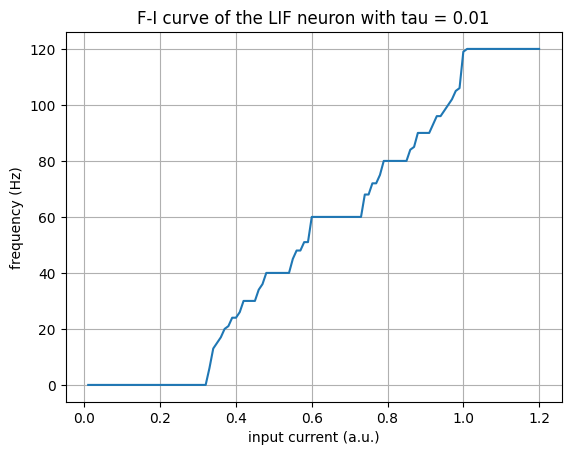

In [108]:
plt.title(f"F-I curve of the LIF neuron with tau = {tao_mem}")
plt.plot(i_array, f_array)
plt.xlabel("input current (a.u.)")
plt.ylabel("frequency (Hz)")
plt.grid()
plt.show()